In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
store = pd.read_csv('/content/Sample_Store_customersspendingcategory.csv')
store.head()

,Customer ID,Customer Name,Total_Spending,Spending_Category,Unnamed: 4
0,SM-20320,Sean Miller,25043.050,High Spender,NaN
1,TC-20980,Tamara Chand,19017.848,High Spender,NaN
2,RB-19360,Raymond Buch,15117.339,High Spender,NaN
3,TA-21385,Tom Ashbrook,14595.620,High Spender,NaN
4,AB-10105,Adrian Barton,14355.611,High Spender,NaN


In [ ]:
store = store.drop(columns = ['Customer ID','Customer Name','Unnamed: 4'])
store.head()

,Total_Spending,Spending_Category
0,25043.050,High Spender
1,19017.848,High Spender
2,15117.339,High Spender
3,14595.620,High Spender
4,14355.611,High Spender


In [ ]:
store.isnull().sum()

,0
Total_Spending,0
Spending_Category,0


In [ ]:
for col in store:
    if store[col].dtype == 'O':
        codes, _ = pd.factorize(store[col])
        store[col] = codes

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total_Spending     793 non-null    float64
 1   Spending_Category  793 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 12.5 KB


## Descriptive Analysis

In [ ]:
store.describe()

,Total_Spending,Spending_Category
count,793.000000,793.000000
mean,2865.636641,1.829760
std,2614.661550,0.438111
min,4.833000,0.000000
25%,1104.184000,2.000000
50%,2218.990000,2.000000
75%,3760.028000,2.000000
max,25043.050000,2.000000


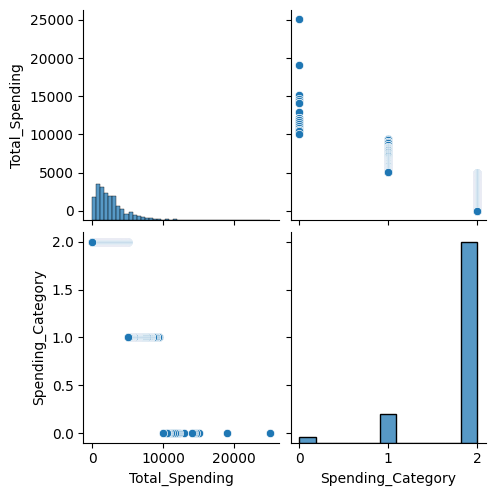

In [ ]:
sns.pairplot(store)

# XGBoost Classifer

In [ ]:
X = store.drop(columns = ['Spending_Category'])
y = store['Spending_Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
store_model = XGBClassifier(n_estimators = 300, max_depth = 8, learning_rate = 0.09, subsample = 0.08)
store_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.09, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = store_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred)* 100)
print("Recall:", recall_score(y_test, y_pred, average = 'weighted')*100)
print("Precision:", precision_score(y_test, y_pred, average = 'weighted')*100)
print("F1 Score:", f1_score(y_test, y_pred, average = 'weighted')*100)

Accuracy: 99.57983193277312
Recall: 99.57983193277312
Precision: 99.593837535014
F1 Score: 99.56429413059521


## Support Vector Classifer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
store_svm = SVC(kernel='linear', tol = 1.9)
store_svm.fit(X_train, y_train)

SVC(kernel='linear', tol=1.9)

In [ ]:
y_pred = store_svm.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred)* 100)
print("Recall:", recall_score(y_test, y_pred, average = 'weighted')*100)
print("Precision:", precision_score(y_test, y_pred, average = 'weighted')*100)
print("F1 Score:", f1_score(y_test, y_pred, average = 'weighted')*100)

Accuracy: 98.99497487437185
Recall: 98.99497487437185
Precision: 99.00686866284083
F1 Score: 98.98001914333572


## Decision Tree Classifer

In [ ]:
store_clf = DecisionTreeClassifier(max_depth = 1)
store_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
y_pred = store_clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred)* 100)
print("Recall:", recall_score(y_test, y_pred, average = 'weighted')*100)
print("Precision:", precision_score(y_test, y_pred, average = 'weighted')*100)
print("F1 Score:", f1_score(y_test, y_pred, average = 'weighted')*100)

Accuracy: 98.49246231155779
Recall: 98.49246231155779
Precision: 97.12625628140702
F1 Score: 97.77576406623281


## Random Forest Classifer

In [ ]:
store_rlf = RandomForestClassifier(n_estimators = 100, max_depth = 1, random_state=42)
store_rlf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, random_state=42)

In [ ]:
y_pred = store_rlf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred)* 100)
print("Recall:", recall_score(y_test, y_pred, average = 'weighted')*100)
print("Precision:", precision_score(y_test, y_pred, average = 'weighted')*100)
print("F1 Score:", f1_score(y_test, y_pred, average = 'weighted')*100)

Accuracy: 98.49246231155779
Recall: 98.49246231155779
Precision: 97.12625628140702
F1 Score: 97.77576406623281


## K-nearest Neighbor Classifer

In [ ]:
store_knn = KNeighborsClassifier(n_neighbors = 3)
store_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = store_knn.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred)* 100)
print("Recall:", recall_score(y_test, y_pred, average = 'weighted')*100)
print("Precision:", precision_score(y_test, y_pred, average = 'weighted')*100)
print("F1 Score:", f1_score(y_test, y_pred, average = 'weighted')*100)

Accuracy: 100.0
Recall: 100.0
Precision: 100.0
F1 Score: 100.0
